# 1.5.9 Feature Matching
## Brute-Force Matching with SIFT Descriptors and Ratio Test

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
resource_path = os.getcwd() + '/resource/'

In [3]:
img1 = cv2.imread(resource_path + 'im0.png',0) # queryImage
img2 = cv2.imread(resource_path + 'im1.png',0) # trainImage

In [4]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

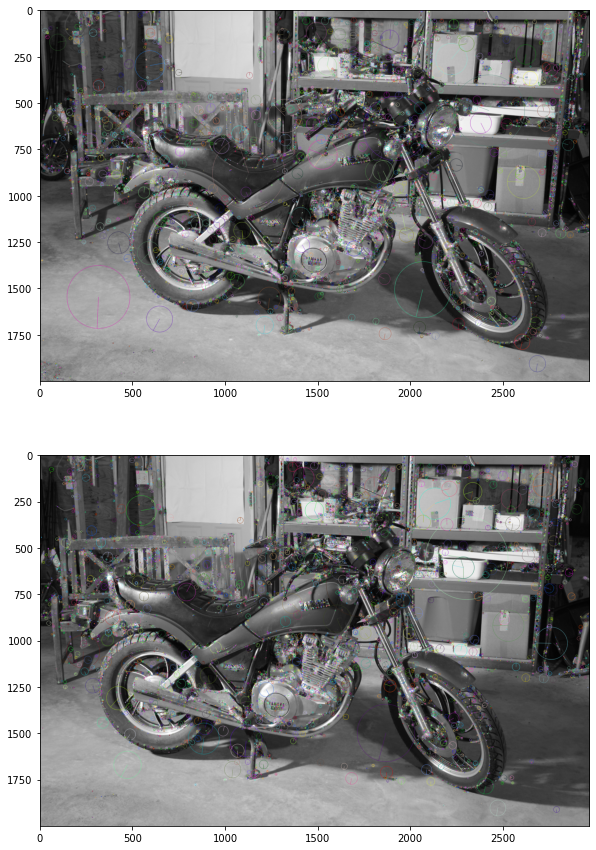

In [5]:
img1v=cv2.drawKeypoints(img1,kp1,img1,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2v=cv2.drawKeypoints(img2,kp2,img2,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(30,15))
plt.subplot(2,1,1), plt.imshow(img1v)
plt.subplot(2,1,2), plt.imshow(img2v)
plt.show()

In [7]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []

In [9]:
for m,n in matches:
    # print(m.distance, n.distance)
    if m.distance < 0.75*n.distance:
        good.append([m])

In [10]:
print(good)

[[<DMatch 000001D8A51893B0>], [<DMatch 000001D8A5189870>], [<DMatch 000001D8A5189930>], [<DMatch 000001D8A51899B0>], [<DMatch 000001D8A51899F0>], [<DMatch 000001D8A5189AF0>], [<DMatch 000001D8A5189BF0>], [<DMatch 000001D8A5189C70>], [<DMatch 000001D8A5189CB0>], [<DMatch 000001D8A5189CF0>], [<DMatch 000001D8A5189D30>], [<DMatch 000001D8A5189D70>], [<DMatch 000001D8A5189EB0>], [<DMatch 000001D8A518C2B0>], [<DMatch 000001D8A518C2F0>], [<DMatch 000001D8A518C430>], [<DMatch 000001D8A518C4F0>], [<DMatch 000001D8A518C570>], [<DMatch 000001D8A518C6B0>], [<DMatch 000001D8A518C8F0>], [<DMatch 000001D8A518C930>], [<DMatch 000001D8A518CAF0>], [<DMatch 000001D8A518CBF0>], [<DMatch 000001D8A518CF30>], [<DMatch 000001D8A518E0F0>], [<DMatch 000001D8A518E1B0>], [<DMatch 000001D8A518E6B0>], [<DMatch 000001D8A518EAB0>], [<DMatch 000001D8A518EB70>], [<DMatch 000001D8A518ECB0>], [<DMatch 000001D8A518ECF0>], [<DMatch 000001D8A518ED70>], [<DMatch 000001D8A518EDF0>], [<DMatch 000001D8A518EF70>], [<DMatch 0000

In [13]:
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)

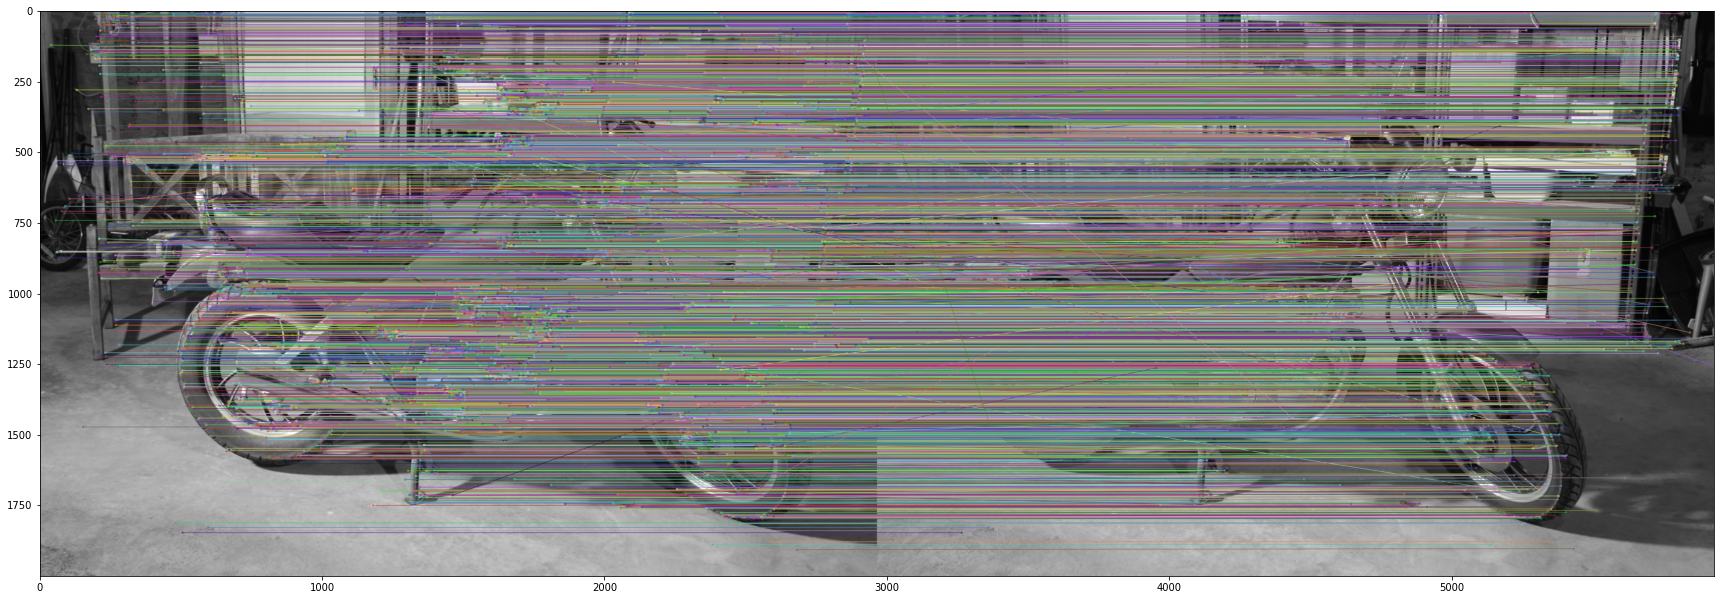

(<matplotlib.image.AxesImage at 0x1d8ac4b04c0>, None)

In [14]:
plt.figure(figsize=(30,15))
plt.imshow(img3),plt.show()